In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from pandas.core import datetools

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, average_precision_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  after removing the cwd from sys.path.


In [2]:
X_unscaled = pd.read_csv('data/HID_reduced_feat.csv')
dfsample1 = pd.read_csv('data/HID_reduced_sample.csv')

In [3]:
X_unscaled.columns

Index(['Unnamed: 0', 'Hospital_Associated_encoded', 'Tot_Sls_Amt',
       'Msa_Dma_encoded', 'Chain_Name_encoded', 'Salesperson_encoded',
       'ST_encoded', 'DC_Name_encoded',
       'Interior_Decor_Signage_Available_Funds', 'Signage_Program_encoded',
       'LMS_Available_Matching_Funds'],
      dtype='object')

### Scale the data

In [4]:
scaler = StandardScaler()

In [5]:
scaler.fit(X_unscaled)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
scaled_features = scaler.transform(X_unscaled)

In [7]:
X = pd.DataFrame(scaled_features,columns=X_unscaled.columns)

### Hierarchical clustering

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [9]:
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [10]:
# generate the linkage matrix - 'Ward' makes more even groupings, 'complete' preserves the tight clusters
Z = linkage(X, 'ward')

In [11]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.41504845538685964

In [12]:
Z[7200:7211]

array([], shape=(0, 4), dtype=float64)

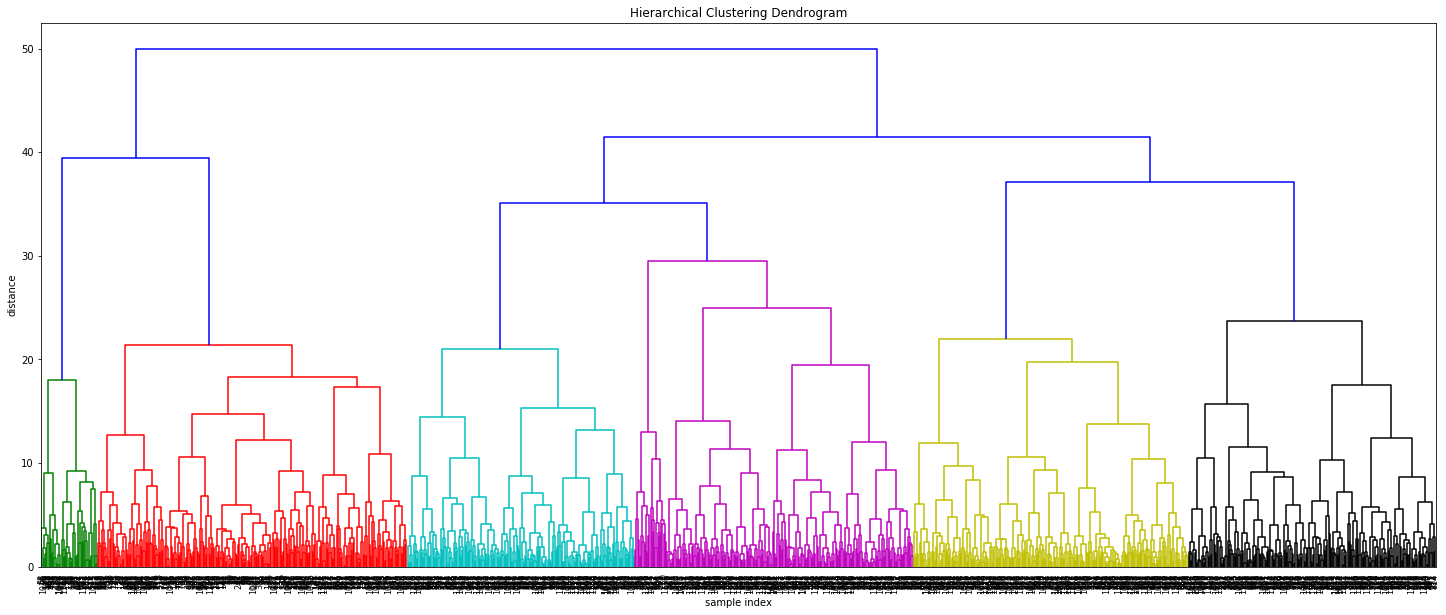

array([ 37.13337,  39.40741,  41.45318,  49.98331])

In [13]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


Z[-4:,2]

In [14]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

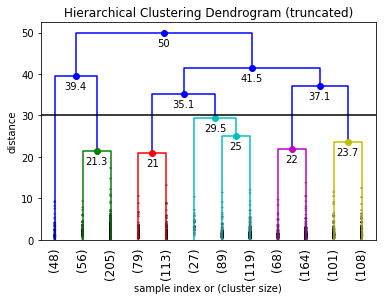

In [19]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,          # useful in small plots so annotations don't overlap
    max_d=30,  # plot a horizontal cut-off line; max_d = max_distance
)
plt.show()

### K Means Clustering

In [16]:
from sklearn.cluster import KMeans

In [17]:
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(X)
X['cluster3'] = kmeans3.labels_

In [18]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(X)
X['cluster4'] = kmeans4.labels_

In [21]:
kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(X)
X['cluster5'] = kmeans5.labels_

In [20]:
kmeans6 = KMeans(n_clusters=6)
kmeans6.fit(X)
X['cluster6'] = kmeans6.labels_

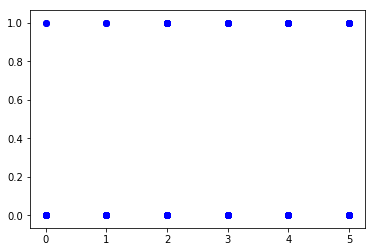

In [28]:
plt.scatter(kmeans6.labels_, dfsample1['IS_HID'], color='b')